# FIFA- An Introduction

![](https://images.daznservices.com/di/library/GOAL/76/63/embed-only-fifa-21-standard-cover-kylian-mbappe_e7cztf9wbiv01asqo9kt24gf2.jpg?t=1998970947&w=1525&h=1900)

FIFA is a series of association football simulation video games developed and released annually by Electronic Arts under the EA Sports label. Football video games such as Sensible Soccer, Kick Off and Match Day had been developed since the late 1980s and already competitive in the games market when EA Sports announced a football game as the next addition to their EA Sports label. The Guardian called the series "the slickest, most polished and by far the most popular football game around".

When the series began in late 1993, it was notable for being the first to have an official licence from FIFA, the world governing body of football. The latest installments in the series contain many exclusively licensed leagues including leagues and teams from around the world, including the German Bundesliga and 2. Bundesliga, English Premier League and EFL Championship, Italian Serie A and Serie B, Spanish La Liga and La Liga 2, French Ligue 1 and Ligue 2, Portuguese Primeira Liga, Turkish Süper Lig, Dutch Eredivisie, Scottish Premiership, the Swiss Super League, Russian Premier League, Polish Ekstraklasa, Mexican Liga MX, American Major League Soccer, South Korean K-League, Japanese J1 League, the Chinese Super League, Saudi Professional League, Australian A-League, Chilean Primera División, Brazilian Campeonato Brasileiro Série A and Argentine Superliga Argentina, allowing the use of real leagues, clubs and player names and likenesses within the games. Popular clubs from around the world, including some teams from Greece, Ukraine and South Africa, are also included, without those nations' entire leagues. The main series has been complemented by additional installments based on single major tournaments, such as the FIFA World Cup, UEFA Champions League, UEFA Europa League and UEFA European Football Championship, as well as a series of football management titles.

As of FIFA 21, Paris Saint-Germain forward Kylian Mbappé is the face of the franchise, appearing on the front cover of the series and in promotional campaigns and advertisements. He takes over from Eden Hazard of Real Madrid who was the face of the previous cover. Lionel Messi appeared on four straight covers from FIFA 13 to FIFA 16. Wayne Rooney has appeared in the most covers being on the cover of every game from FIFA 06 to FIFA 12. Since the release of FIFA Mobile in 2016, forward Marco Reus, Eden Hazard, Cristiano Ronaldo, Neymar, and Paulo Dybala have appeared on the cover

![](https://media.contentapi.ea.com/content/dam/ea/fifa/images/2020/06/fifa-landing-hero-medium-fifa21-launch-7x2-xl.png.adapt.crop16x9.320w.png)

# Importing the libraries

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
pd.options.display.max_columns = None
pd.options.display.max_rows = None

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Reading the Data

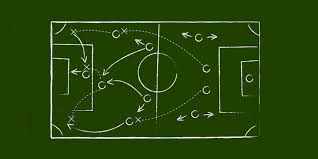

In [ ]:
fifa=pd.read_csv('/kaggle/input/fifa-21-complete-player-dataset/fifa21_male2.csv')
fifa.head()

# Checking out the Data Types

In [ ]:
fifa.dtypes

# Identifying the null Values

In [ ]:
fifa.isnull().sum()

# Cleaning the null values in the rows

In [ ]:
fifa['Volleys'].replace({np.NaN:fifa['Volleys'].mean()},inplace=True)
fifa['Curve'].replace({np.NaN:fifa['Curve'].mean()},inplace=True)
fifa['Agility'].replace({np.NaN:fifa['Agility'].mean()},inplace=True)
fifa['Balance'].replace({np.NaN:fifa['Balance'].mean()},inplace=True)
fifa['Jumping'].replace({np.NaN:fifa['Jumping'].mean()},inplace=True)
fifa['Interceptions'].replace({np.NaN:fifa['Interceptions'].mean()},inplace=True)
fifa['Positioning'].replace({np.NaN:fifa['Positioning'].mean()},inplace=True)
fifa['Composure'].replace({np.NaN:fifa['Composure'].mean()},inplace=True)
fifa['Sliding Tackle'].replace({np.NaN:fifa['Sliding Tackle'].mean()},inplace=True)

# Finding the total count of players available

In [ ]:
fifa.Name.nunique()

# What is the nationwise participation in the Game?

![](https://upload.wikimedia.org/wikipedia/en/thumb/8/8b/England_national_football_team_crest.svg/1200px-England_national_football_team_crest.svg.png)

In [ ]:
nat_cnt=fifa.groupby('Nationality').apply(lambda x:x['Name'].count()).reset_index(name='Counts')
nat_cnt.sort_values(by='Counts',ascending=False,inplace=True)
top_20_nat_cnt=nat_cnt[:20]
fig=px.bar(top_20_nat_cnt,x='Nationality',y='Counts',color='Counts',title='Nationwise Representation in the FIFA Game')
fig.show()

**Observations** England has the highest number of players in FIFA 21 game. One of the major reasons in this regards is due to the EA franchise, which has predominatingly most user base in UK. Also in FIFA, English League has the most number of teams- generating the most number of players

# Which nation has the most number of over performing players?

![](https://footballia.net/cache/matches/d2487c60b29845f93bbcbcffc8522024.png)

**Note** We have only selected countries that have atleast 150 players in record. This is done in order to avoid any bias

In [ ]:
cnt_best_avg=fifa.groupby('Nationality').apply(lambda x:np.average(x['OVA'])).reset_index(name='Overall Ratings')
cnt_best_cnt=fifa.groupby('Nationality').apply(lambda x:x['OVA'].count()).reset_index(name='Player Counts')
snt_best_avg_cnt=pd.merge(cnt_best_avg,cnt_best_cnt,how='inner',left_on='Nationality',right_on='Nationality')
sel_best_avg_cnt=snt_best_avg_cnt[snt_best_avg_cnt['Player Counts']>=200]
sel_best_avg_cnt.sort_values(by=['Overall Ratings','Player Counts'],ascending=[False,False])
px.scatter(sel_best_avg_cnt,x='Overall Ratings',y='Player Counts',color='Player Counts',size='Overall Ratings',hover_data=['Nationality'],title='Nationwise Player counts and Average Potential')


**Observations** England and Brazil are the teams that deserve a mention in this aspect. England since it has produced 1707 players, and still is having an average of 63.64, while Brazil has the highest average Ratings among the players

# What has been the team wise player counts?

![](https://hdliveextra-a.akamaihd.net/HD/image_sports/mobile/nbc_pl_muchehl_201024_640x360.jpg)

In [ ]:
clb_cnt=fifa.groupby('Club').apply(lambda x:x['Name'].count()).reset_index(name='Counts')
clb_cnt.sort_values(by='Counts',ascending=False,inplace=True)
fig=px.scatter(clb_cnt,x='Club',y='Counts',color='Counts',title='Clubwise Player counts in FIFA 21')
fig.show()

**Observation** Chealsea and Manchester United have the most number of Players in record as a Club in FIFA 21- 45 players information for both the clubs. Just a general observation, the average count of players for the English Premier League is more tahn any other leage. This shows the prioritization of English football by FIFA

# Which Team has the most number of Over Performing Players?

![](https://i.ytimg.com/vi/qXTX8wtf4sw/maxresdefault.jpg)

**Note** We have only selected clubs that have atleast 25 players in record. This is done in order to avoid any bias

In [ ]:
cnt_best_avg=fifa.groupby('Club').apply(lambda x:np.average(x['OVA'])).reset_index(name='Overall Ratings')
cnt_best_cnt=fifa.groupby('Club').apply(lambda x:x['OVA'].count()).reset_index(name='Player Counts')
snt_best_avg_cnt=pd.merge(cnt_best_avg,cnt_best_cnt,how='inner',left_on='Club',right_on='Club')
sel_best_avg_cnt=snt_best_avg_cnt[snt_best_avg_cnt['Player Counts']>=25]
sel_best_avg_cnt.sort_values(by=['Overall Ratings','Player Counts'],ascending=[False,False])
px.scatter(sel_best_avg_cnt,x='Overall Ratings',y='Player Counts',color='Player Counts',size='Overall Ratings',hover_data=['Club'],title='Clubwise player counts and Average Potential')


**Observation** As per the above chart, two teams deserve a special mention in this regard. Firstly it is Bayern Munich- The team which has the highest average rating among all the teams (81.26) from a set of 26 players. Another team is Manchester United- which has the highest average amon the teams with 45 layers. They have an average of 75.866 on the 45 players

# What is the Height vs Weight variation of the Footballers?

In [ ]:
props=fifa[['Name','Nationality','Club','Height','Weight']]
props['Ht in ft']=pd.to_numeric(props['Height'].str[0])
props['Ht in in']=pd.to_numeric(props['Height'].str.split("\'").str[1].str.strip('"'))
props['Ht in cm']=(props['Ht in ft']*12+props['Ht in in'])*2.54
props['Weight in lb']=pd.to_numeric(props['Weight'].str.strip('lbs'))
fig=px.scatter(props,x='Weight in lb',y='Ht in cm',color='Ht in cm',size='Weight in lb',hover_data=['Name','Nationality','Club'],title='Height vs Weight Variation of the players in FIFA 21')
fig.show()

**Observation** Generally for a healthy football player, the height and weight are in a proportion. Else he/she willto be too weak/heavy- and not have the peak fitness form. This is seen from the above scatter plot.

# Count of players position wise

![](https://img2.storyblok.com//f/73553/1152x752/aafcf885a9/the-modern-center-back-defender-fi.jpg)

In [ ]:
pos_cnt=fifa.groupby('BP').apply(lambda x:x['Name'].count()).reset_index(name='Counts')
pos_cnt.sort_values(by='Counts',ascending=False,inplace=True)
top_20_pos_cnt=pos_cnt[:20]
fig=px.bar(top_20_pos_cnt,x='BP',y='Counts',color='Counts',title='Positionwise Player counts in FIFA 21')
fig.show()

**Observation** In FIFA 21, the most number of player population is for the Center Back Position, which is followed by Striker and The Central attacking midfielder positions.

# What is the age Distribution of the players?

In [ ]:
age_cnt=fifa.groupby('Age').apply(lambda x:x['Name'].count()).reset_index(name='Counts')
fig=px.bar(age_cnt,x='Age',y='Counts',color='Counts',title='Agewise Player distribution in FIFA 21')
fig.show()

**Observation** The chart looks like a normal curve which is left skewed. On an average 20-24 is the average age for most of the footballers in FIFA21

# What is the distibution of Market Value and Wage for the players?

![](https://sportstar.thehindu.com/third-party/opta/article29338356.ece/ALTERNATES/LANDSCAPE_1200/kylian-mbappe-and-lionel-messi-croppediakm91o9jkbr1bx72g07m785fjpg)

In [ ]:
cost_prop=fifa[['Name','Club','Nationality','Wage','Value','BP']]
cost_prop['MultW']=np.where(cost_prop.Wage.str[-1]=='K',1000,1)
cost_prop['Wage']=cost_prop.Wage.str.strip('K')
cost_prop['Wage']=cost_prop.Wage.str.strip('€')
cost_prop['Wage']=pd.to_numeric(cost_prop['Wage'])
cost_prop['Wage in €']=cost_prop['Wage']*cost_prop['MultW']
cost_prop['MultV']=np.where(cost_prop.Value.str[-1]=='K',1000,np.where(cost_prop.Value.str[-1]=='M',1000000,1))
cost_prop['Value']=cost_prop.Value.str.strip('€')
cost_prop['Value']=cost_prop.Value.str.strip('K')
cost_prop['Value']=cost_prop.Value.str.strip('M')
cost_prop['Value']=pd.to_numeric(cost_prop['Value'])
cost_prop['Value in €']=cost_prop['Value']*cost_prop['MultV']
fig=px.scatter(cost_prop,x='Value in €',y='Wage in €',color='Value in €',size='Wage in €',hover_data=['Name','Club','Nationality','BP'],title='Value vs Wage Presentation of all the Players')
fig.show()

**Observation** Lionel Messi tops the chart as the player with the highest wage. While Kylian Mbappe tops in terms of Market value. A general observation, we see the forward players usually having a higher Value and Wages. Is there a bias? Lets deep dive later!

# How does the game attributes vary with position?

In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sns


pos_head=fifa.groupby('BP').apply(lambda x:np.average(x['Heading Accuracy'])).reset_index(name='Heading Accuracy')
pos_sp=fifa.groupby('BP').apply(lambda x:np.average(x['Short Passing'])).reset_index(name='Short Passing')
pos_d=fifa.groupby('BP').apply(lambda x:np.average(x['Dribbling'])).reset_index(name='Dribbling')
pos_c=fifa.groupby('BP').apply(lambda x:np.average(x['Curve'])).reset_index(name='Curve')
pos_fk=fifa.groupby('BP').apply(lambda x:np.average(x['FK Accuracy'])).reset_index(name='FK Accuracy')
pos_lp=fifa.groupby('BP').apply(lambda x:np.average(x['Long Passing'])).reset_index(name='Long Passing')
pos_bc=fifa.groupby('BP').apply(lambda x:np.average(x['Ball Control'])).reset_index(name='Ball Control')
pos_ss=fifa.groupby('BP').apply(lambda x:np.average(x['Sprint Speed'])).reset_index(name='Sprint Speed')
pos_spo=fifa.groupby('BP').apply(lambda x:np.average(x['Shot Power'])).reset_index(name='Shot Power')
pos_jm=fifa.groupby('BP').apply(lambda x:np.average(x['Jumping'])).reset_index(name='Jumping')

pos_overall1=pd.merge(pos_head,pos_sp,how='inner',left_on='BP',right_on='BP')
pos_overall2=pd.merge(pos_d,pos_c,how='inner',left_on='BP',right_on='BP')
pos_overall3=pd.merge(pos_fk,pos_lp,how='inner',left_on='BP',right_on='BP')
pos_overall4=pd.merge(pos_bc,pos_ss,how='inner',left_on='BP',right_on='BP')
pos_overall5=pd.merge(pos_spo,pos_jm,how='inner',left_on='BP',right_on='BP')
pos_overall11=pd.merge(pos_overall1,pos_overall2,how='inner',left_on='BP',right_on='BP')
pos_overall22=pd.merge(pos_overall3,pos_overall4,how='inner',left_on='BP',right_on='BP')
pos_overall12=pd.merge(pos_overall11,pos_overall22,how='inner',left_on='BP',right_on='BP')
pos_overall=pd.merge(pos_overall12,pos_overall5,how='inner',left_on='BP',right_on='BP')
print('Overall Attributes of the Players in FIFA 21')
fig=plt.figure(figsize=(30,30))
for i in range(0,15):
    labels=np.array(['Heading Accuracy',
                     'Short Passing', 
                     'Dribbling', 
                     'Curve',
                     'FK Accuracy',
                     'Long Passing',
                     'Ball Control',
                     'Sprint Speed',
                     'Shot Power',
                     'Jumping'])
    stats=pos_overall.loc[i,labels].values

    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    # close the plot
    stats=np.concatenate((stats,[stats[0]]))
    angles=np.concatenate((angles,[angles[0]]))

    
    ax = fig.add_subplot(5,3,i+1, polar=True)
    ax.plot(angles, stats, 'o-', linewidth=1)
    ax.fill(angles, stats,color='red',alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, labels)
    ax.set_title([pos_overall.loc[i,"BP"]])
    ax.grid(True)


**Observation** All overall game attributes have been considered. The paramters considered here have a slight bias against the Goalkeepers, But will be working upon to improve the same. Overall among the selected categories, we see the Center Half players and the Center Forwards have a better performance matrix as compared to the rest of the positions 

# Who are the best players in the game?

![](https://icdn.juvefc.com/wp-content/uploads/2020/10/Ronaldo-Messi.jpg)

In [ ]:
top_play=fifa[['Name','OVA',"Age",'Club','BP']]
top_play.sort_values(by='OVA',ascending=False,inplace=True)
top_30_play=top_play[:100]
fig=px.scatter(top_30_play,x='Age',y='OVA',color='Age',size='OVA',hover_data=['Name','Club','BP'],title='Top Football Players in the FIFA 21 game')
fig.show()

**Observation** I guess any fan of this beautiful game would accept that we have the 2 best players of this era currently playing- Lionel Messi and Cristiano Ronaldo. But they are now at the age of 33 and 35 respectively- and have a last few years in their hand. Among the youngest players, Kylian Mbappe, Jadon Snacho and Trent Alexander Arnold deserve a special mention.

# Who are the Players with the highest Potential??

PS. We will remove the players whose meximum potential is their current form. This was done primarily in order to select the younger players who shall be the top players in the recent future. Hence we have also kept a filter which will help us to identify the best players under the age of 27

In [ ]:
cond_1=fifa['OVA']!=fifa['POT']
cond_2=fifa['Age']<25
fifa_fil=fifa[cond_1 & cond_2]
pot_play=fifa_fil[['Name','Age','Nationality','Club','POT','BP','OVA','Value','Release Clause']]
pot_play.sort_values(by='POT',ascending=False,inplace=True)
top_pot_play=pot_play[:50]
fig=px.scatter(pot_play,x='Age',y='POT',size='POT',color='Age',hover_data=['Name','Age','Nationality','BP','OVA','Value','Release Clause'],title='Age vs Maximum Potential Distribution of the young Players')
fig.show()

**Observation** Kylian Mabappe tops the chart of players who have the maximum potential, and is justified as the cover picture of the FIFA game. Closely following are Sancho, Vinicius Jr., Felix and K. Havertz. Undoubtedly they are the most sought after players currently as seen by their market value and the release clause.

# Lets Create some Fantasy Football Teams!!!

# Most Preffered Formation:-    3-4-3

# Why?# 

Personnaly I am able to choose the best player from each position- and hence create the most powerful team. Secondly, as I am a fan of passing football, this formation helps to distribute my game to the maximum. Hence, I shall be making the teams here with this formation.

# Best overall Team in Fifa 21

![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTjqcoC6D4D-VqmVmfwOn0FcLmqj2r8ycw2gA&usqp=CAU)

In [ ]:
final_team=fifa[['Name','Age','OVA','BP','Club']]
final_team.sort_values(by='Age',inplace=True)
pos_play=final_team.groupby('BP').apply(lambda x:np.max(x['OVA'])).reset_index(name='Overall Score')
player_pos=pd.merge(final_team,pos_play,how='inner',left_on=['BP','OVA'],right_on=['BP','Overall Score'])
pos_best=player_pos[['Name','Club','Age','BP','Overall Score']]
cm = sns.light_palette("yellow", as_cmap=True) 
pos_best.style.background_gradient(cmap=cm).set_precision(2)

# Let's check out the Best playing 11 in our required formation

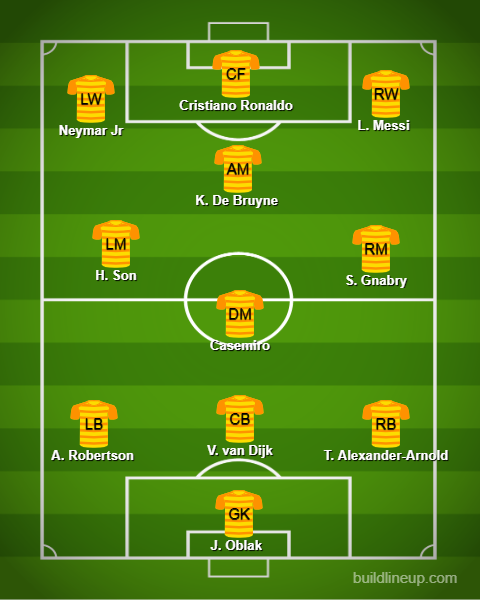

**Observation** Wow, I would not even dare to play against this team... too much power packed it is!

# Lets make the Team with the players with the highest potential

**Note** The Potential cannot be equal to the Overall Score, and the age of the players must be smaller than 25

In [ ]:
final_team=fifa_fil[['Name','Age','POT','BP','Club']]
final_team.sort_values(by='Age',inplace=True)
pos_play=final_team.groupby('BP').apply(lambda x:np.max(x['POT'])).reset_index(name='Potential')
player_pos=pd.merge(final_team,pos_play,how='inner',left_on=['BP','POT'],right_on=['BP','Potential'])
pos_best=player_pos[['Name','Club','Age','BP','Potential']]
cm = sns.light_palette("black", as_cmap=True) 
pos_best.style.background_gradient(cmap=cm).set_precision(2)

# Lets select the playing XI which has the maximum potential to be the ultimate team in the recent future

Note: In case of 2 playes having the same potential, we have selected the younger player to represent the team. 

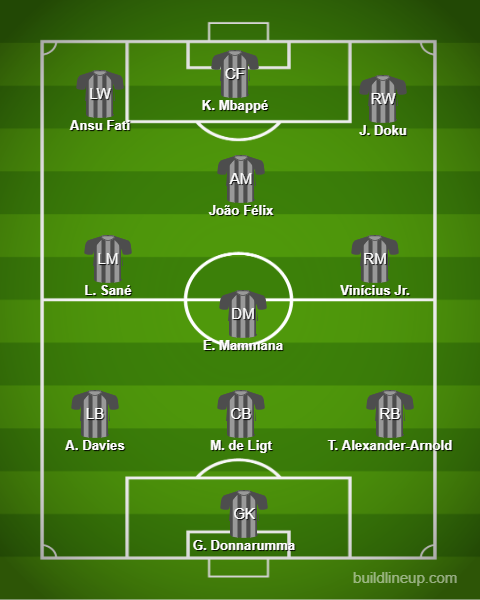

**Observation** Only 1 player- Trent Alexander-Arnold is common between both the teams, indicating his terrific performance with respect to his age. But seriously, this team can be a real threat to the top team in FIFA 21! Challenge is now accepted!

# Lets create the best fantasy Team for English Premier League!

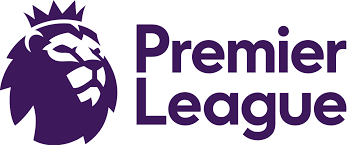

In [ ]:
epl_team=fifa[fifa.Club.isin(['Manchester United','Manchester City','Newcastle United','Hull City','Stoke City','Bournemouth',
                                'Nottingham Forest','Portsmouth','Sheffield Wednesday','Charlton Athletic',
                                'Huddersfield Town','Wolverhampton Wanderers','Oxford United','Arsenal de Sarandí','Everton',
                                'Bolton Wanderers','Liverpool','Derby County','Arsenal','Tottenham Hotspur',
                                'Birmingham City','Swansea City','Chelsea','Middlesbrough','Barnsley','Norwich City',
                                'Watford','Swindon Town','Coventry City','Leicester City','Ipswich Town',
                                'Cardiff City','Burnley','Wigan Athletic','Crystal Palace','West Ham United',
                                'Bristol City','Sheffield United','Oldham Athletic','Southampton','Leeds United','Liverpool Fútbol Club'])]
epl_final_team=epl_team[['Name','Age','OVA','BP','Club']]
epl_final_team.sort_values(by='Age',inplace=True)
pos_play=epl_final_team.groupby('BP').apply(lambda x:np.max(x['OVA'])).reset_index(name='Overall Score')
player_pos=pd.merge(epl_final_team,pos_play,how='inner',left_on=['BP','OVA'],right_on=['BP','Overall Score'])
pos_best=player_pos[['Name','Club','Age','BP','Overall Score']]
cm = sns.light_palette("red", as_cmap=True) 
pos_best.style.background_gradient(cmap=cm).set_precision(2)

# Let's check out one of the best teams of English Premier League in Fifa 21

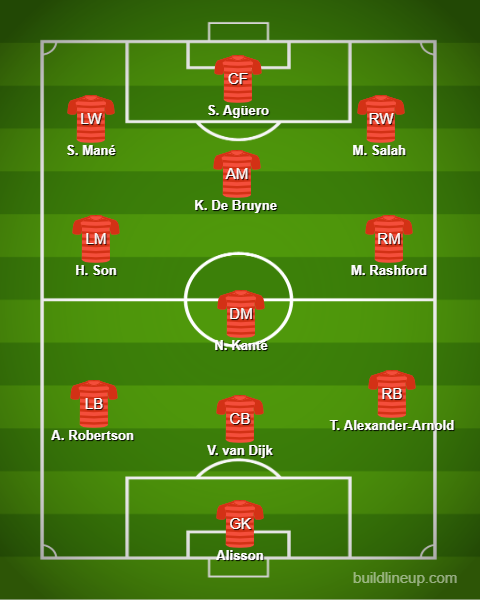

**Observation** Well if this team would play in the Premier League, even the Classic XI would fall. Truly a great combination of players

# Now, Let's check for the Team I support... FC Barcelona

![](https://upload.wikimedia.org/wikipedia/en/thumb/4/47/FC_Barcelona_%28crest%29.svg/1200px-FC_Barcelona_%28crest%29.svg.png)

# Who are the best agewise players in BARCA???

In [ ]:
barca_team_all_players=fifa[fifa['Club']=='FC Barcelona']
barca_team_all_players

**Observation** We see some of the players are present in the list- who have retired from the game. This might be an issue in the data. Hence let us remove those players from the team level analysis. We only keep the list of those players who have their contract ending after 2020.

**Keeping only the eligible players**

In [ ]:
barca_team_all_players['Contract Start']=pd.to_numeric(barca_team_all_players['Contract'].str.split(' ~ ').str[0])
barca_team_all_players['Contract End']=pd.to_numeric(barca_team_all_players['Contract'].str.split(' ~ ').str[-1])
barca_team_all=barca_team_all_players[barca_team_all_players['Contract End']>2020]

# Agewise best players in Barcelona Team...

In [ ]:
barca_team=barca_team_all[['Name','Age','OVA','BP']]
barca_team.sort_values(by='Age',inplace=True)
age_play=barca_team.groupby('Age').apply(lambda x:np.max(x['OVA'])).reset_index(name='Overall Score')
player_age=pd.merge(barca_team,age_play,how='inner',left_on=['Age','OVA'],right_on=['Age','Overall Score'])
age_best=player_age[['Name','Age','BP','Overall Score']]
cm = sns.light_palette("green", as_cmap=True) 
age_best.style.background_gradient(cmap=cm).set_precision(2)

# Who are the best position players in Barca???

In [ ]:
barca_team_2=barca_team_all[['Name','Age','OVA','BP']]
barca_team_2.sort_values(by='BP',inplace=True)
age_play=barca_team_2.groupby('BP').apply(lambda x:np.max(x['OVA'])).reset_index(name='Overall Score')
player_pos=pd.merge(barca_team_2,age_play,how='inner',left_on=['BP','OVA'],right_on=['BP','Overall Score'])
pos_best=player_pos[['Name','Age','BP','Overall Score']]
cm = sns.light_palette("blue", as_cmap=True) 
pos_best.style.background_gradient(cmap=cm).set_precision(2)

# Let's make the Dream formation for the Barca Team using the analysis above!

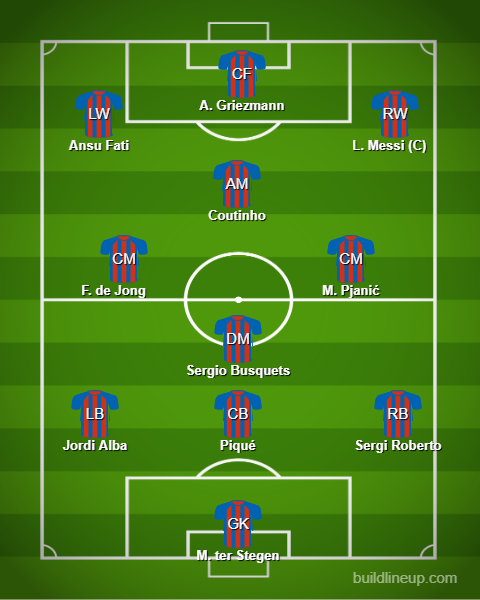

**Observation** Well this would be the Team I would want in Barca. Have still not been able to come out of the 8-2 nightmare by Bayern Munich. But Keeping the fingers crossed!

# Finally, I would like to make a team for my very country... India

![](https://lh3.googleusercontent.com/proxy/f4BDai_DGZFqT4IkTyirKdT4tWyh8F9C9RBjw21ixDI_4C9r-EURw0O_8GMus_mYlQ9cO1qopG23p_D_EQMAgx7qXVmHcZsDlKPBONLHsBfwkfElIPc3_7I-UNhcnsxnyTNd1esr)

In [ ]:
india_team_all_players=fifa[fifa['Nationality']=='India']
india_team_2=india_team_all_players[['Name','Age','OVA','BP']]
india_team_2.sort_values(by='BP',inplace=True)
age_play=india_team_2.groupby('BP').apply(lambda x:np.max(x['OVA'])).reset_index(name='Overall Score')
player_pos=pd.merge(india_team_2,age_play,how='inner',left_on=['BP','OVA'],right_on=['BP','Overall Score'])
pos_best=player_pos[['Name','Age','BP','Overall Score']]
cm = sns.light_palette("cyan", as_cmap=True) 
pos_best.style.background_gradient(cmap=cm).set_precision(2)

# Lets make the Team for India as done above!

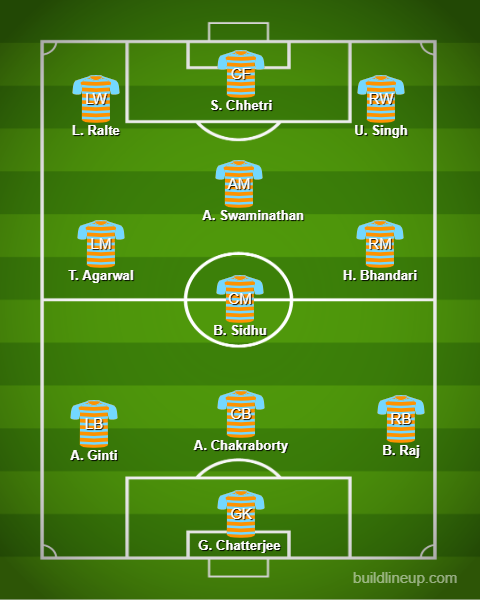

**Observation** The Indian Football Team is really pacing up in the recent times and trying to catch up with the Stalwarts of Asian Football. Also initiatives like Indian Super League (ISL) is really working on to bring up Indian youngsters to the limelight. But above all, this sport requires our faith, trust, enthusiasm and passion. Its with that we shall be able to improve, and maybe... play in the World Cup Tournament after a few years!

# Conclusion

We have checked upon the data, and as of now inferred upon a set of conclusions. These are listed in the below points:

1. Firstly, EA Sports is really a fan of English football, and the amount of English football dominanace in FIFA 21 is as much as any older version. However, the ratings were not biased and were alloted in a sensible manner.
2. FIFA 21 has a huge collection of Clubs in record, and almost covers all the Major Leagues of the world. Also going by Nationality, it supports almost all the football playing nations. Overall the span of the game is huge and charming for every player who is a part of it.
3. The Height and Weight distribution of the players is sensibly distributed. Its generally directly proportional, with a few outlier cases.
4. The Player performance Radar Chart is made considering only a handful attributes- that have clearly indicated the supremacy of the Center Half and the Forwards. In the upcoming commits, I will work upon to make the attributes more distributed towards all the positions.
5. In my opinion, the overall ratings were given correctly depending upon the recent performance, keeping the age factor in mind. This has been well though of by the FIFA Team.
6. Regarding the formation, I am most comfotable with 4 players in the center field hence I have provided this set. However, I am looking into ways to provide multiple formation combinations thatmight produce an amazing team. Will be working for the same in the upcoming releases.

Regarding the Data:

1. The Data is extremely detailed and this analysis can be expanded much further due to the great extent of the data. This is something I found really great to work with. I plan to make much more out of this data.
2. The data is fairly clean, and needed some basic cleaning to start the analysis. Overall helping in the Analysis.

# Please Give an upvote if you liked this Analysis!!!